# Algoritmo Arbol de Decisión (Regresión)

## Paso 1: Cargar las librerías

In [7]:
###Import de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Arbol de decisión
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

##Import de métricas
from sklearn import metrics

##Graficar el arbol
from sklearn import tree

##Evitar warning
import warnings
warnings.filterwarnings('ignore')

## Funciones

In [15]:
##Función para cargar data desde internet - asumiendo separador comas(,)
def cargDI(url, sep=None):
    return pd.read_csv(url, sep= sep)

##Graficar el rendimiento del modelo
def grafRen(varX, xtest, ytest, ypred, modelo):
    X_grid = np.arange(min(varX), max(varX), 0.01)
    X_grid = X_grid.reshape((len(X_grid),1))
    plt.scatter(xtest, ytest, color='red')
    plt.scatter(xtest, ypred, color='green')
    plt.title('Modelo de Arbol de Decisión')
    plt.xlabel('Temperatura')
    plt.ylabel('Ventas')
    plt.show()

    plt.plot(X_grid, modelo.predict(X_grid), color='blue')
    plt.title('Rendimiento del Modelo de Arbol de Decisión')
    plt.xlabel('Temperatura')
    plt.ylabel('Ventas')
    plt.show()

## Paso 2: Importar la data

In [16]:

datos = cargDI('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

datos.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [17]:
##Sin datos NA para arbol de decisión
datos.isna().sum().sum()

0

## Paso 3: Modelo y entrenamiento

In [60]:
##Particionar la data
X = datos['Temperature'].values
y = datos['Revenue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

regressor = DecisionTreeRegressor(max_depth=4)

modelo = regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_pred = modelo.predict(X_test.reshape(-1,1))

df = pd.DataFrame({'Valores Actuales':y_test.reshape(-1), 'Valores Predecidos':y_pred.reshape(-1)})

df.head()


,Valores Actuales,Valores Predecidos
0,524.236115,530.130337
1,685.654655,788.410216
2,323.944672,306.820999
3,295.339699,306.820999
4,344.688765,306.820999


## Paso 4: Graficas rendimiento de la predicción con el árbol

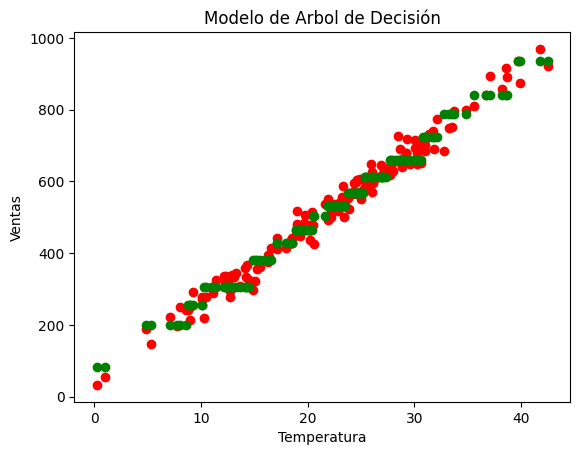

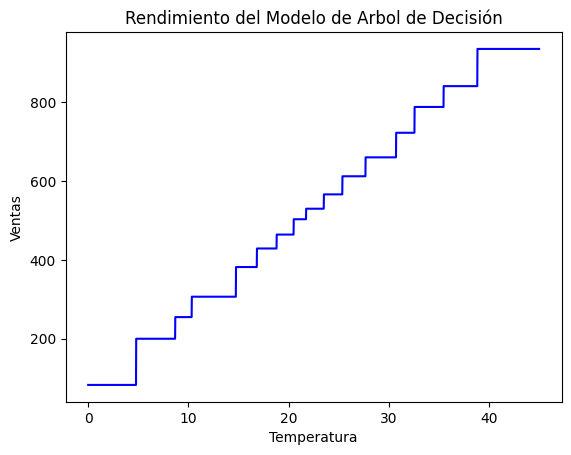

In [61]:
grafRen(X, X_test, y_test, y_pred, modelo)

## Paso 5: Métricas

In [62]:
print('La eficiencia del modelo es:', metrics.r2_score(y_test, y_pred))
print('Error Mediático Cuadrático (RMSE)', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

La eficiencia del modelo es: 0.9709129708247203
Error Mediático Cuadrático (RMSE) 31.723062147013298


In [63]:
(31.723062147013298/500)*100

6.34461242940266

## Paso Final: Gráfica del Arbol

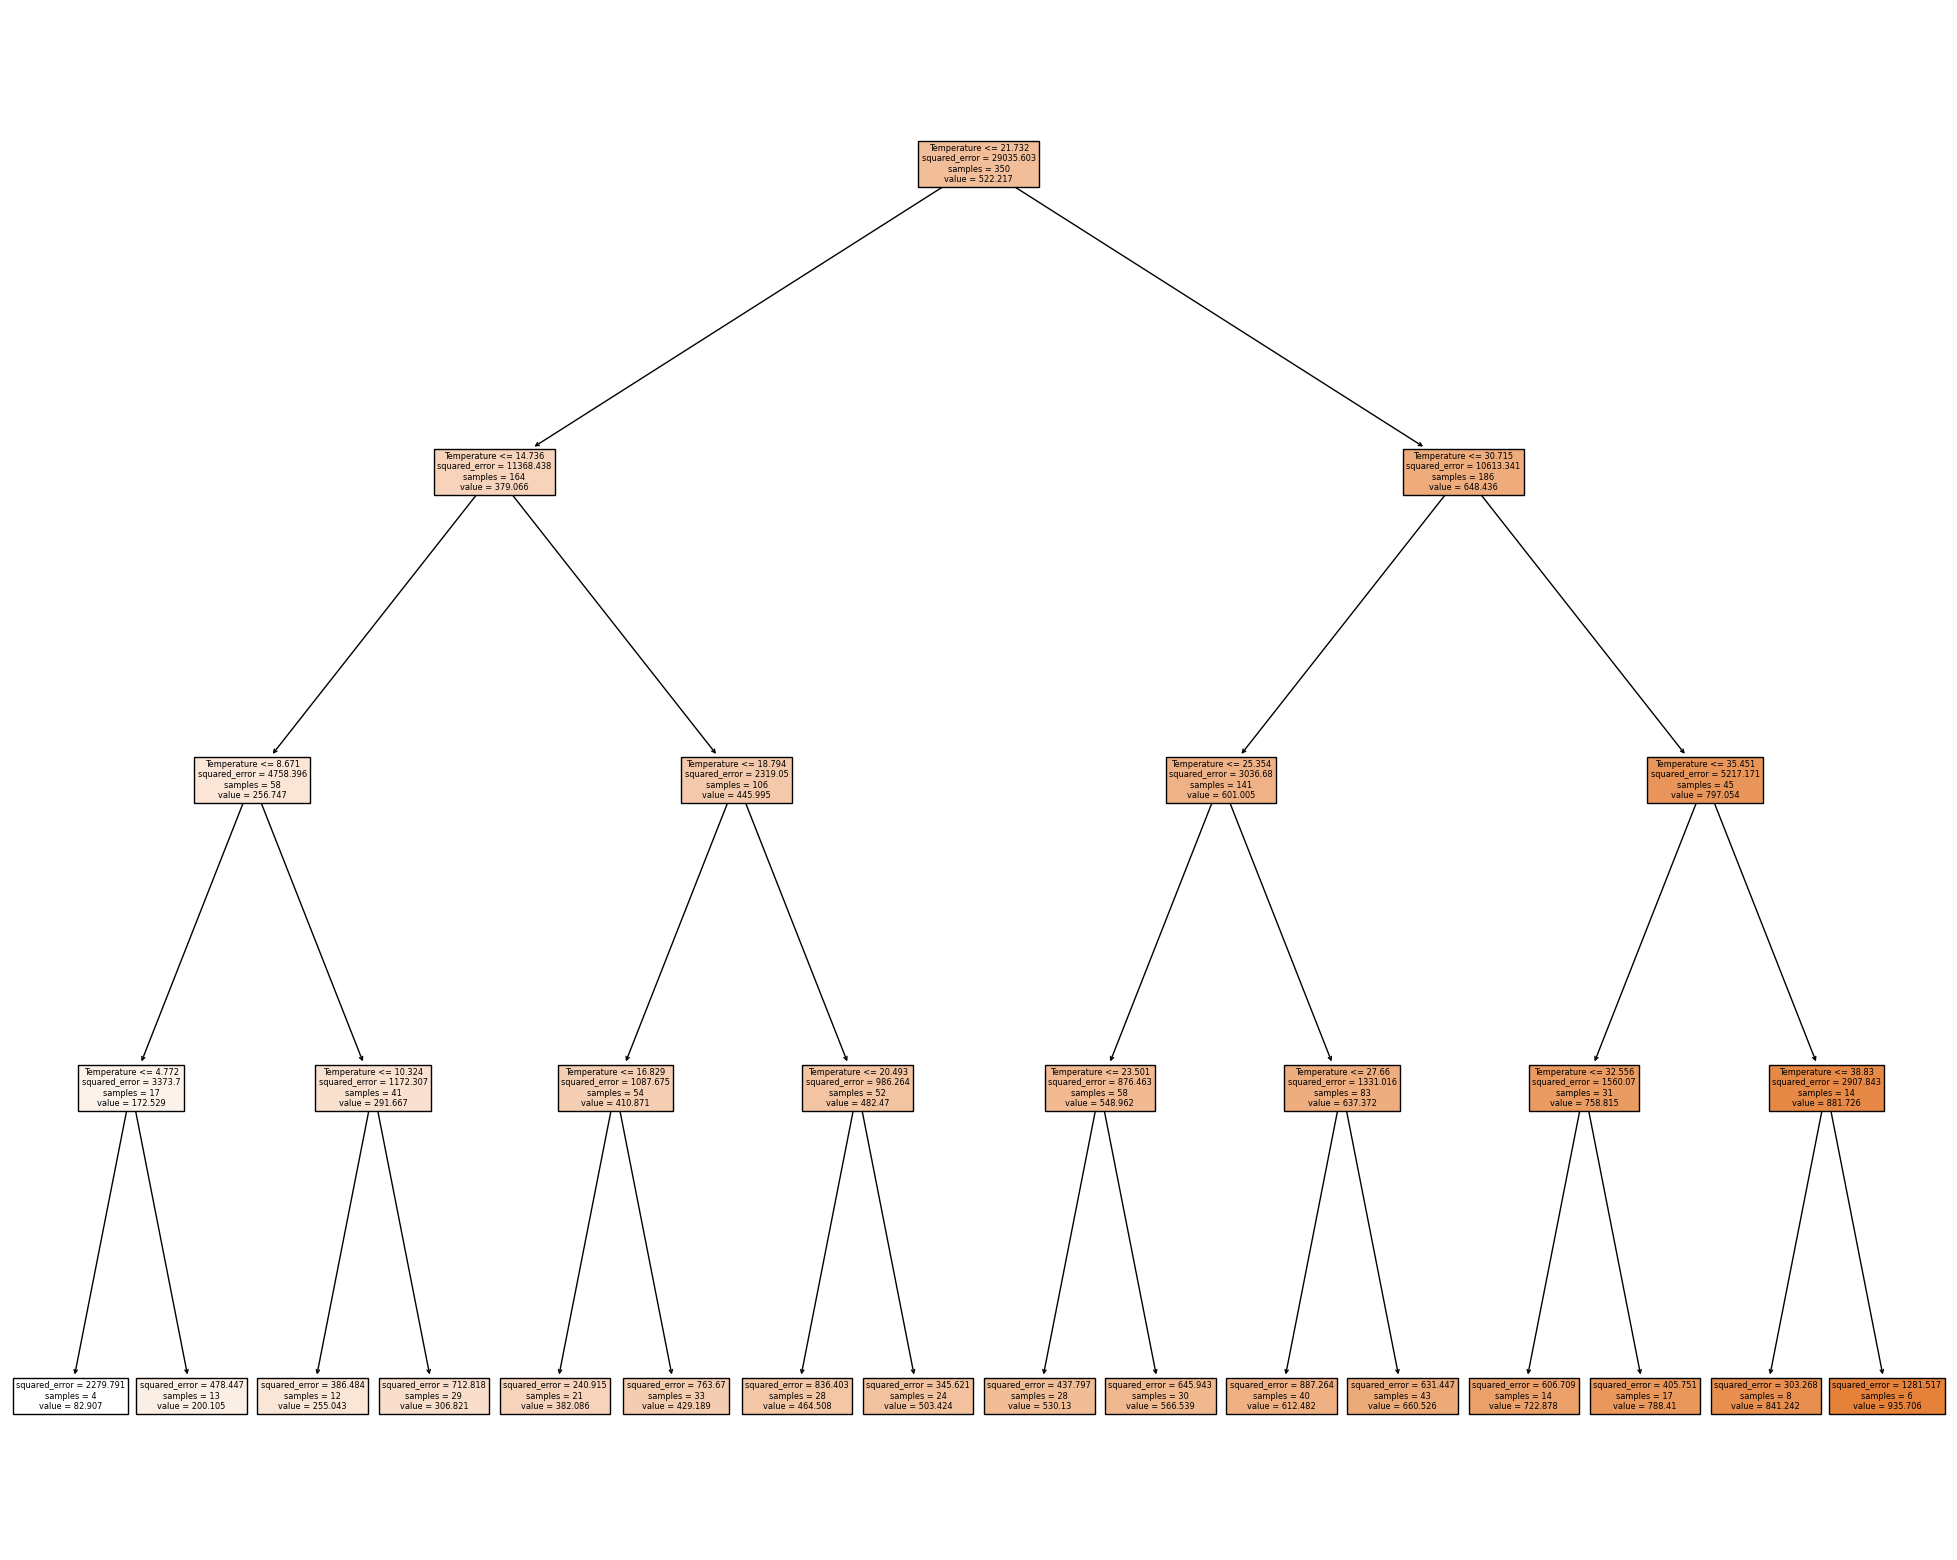

In [64]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(modelo, feature_names=datos.columns, filled=True)